In [1]:
import glob
import numpy as np
import pandas as pd

In [2]:
fs = glob.glob("./log/n*.txt")
fs

['./log/nyuv2-mtan-dwa.txt',
 './log/nyuv2-split-dwa.txt',
 './log/nyuv2-dense-dwa.txt',
 './log/nyuv2-cross-dwa.txt',
 './log/nyuv2-dense.txt',
 './log/nyuv2-cross.txt',
 './log/nyuv2-mtan.txt',
 './log/nyuv2-split.txt',
 './log/nyuv2-stan-semantic.txt',
 './log/nyuv2-single-semantic.txt',
 './log/nyuv2-stan-depth.txt',
 './log/nyuv2-single-depth.txt',
 './log/nyuv2-stan-normal.txt',
 './log/nyuv2-single-normal.txt',
 './log/nyuv2-mtan-tdwa-r0.1.txt',
 './log/nyuv2-mtan-tdwa-r0.2.txt',
 './log/nyuv2-mtan-tdwa-r0.3.txt']

In [3]:
singletask_cnames_SEMANTIC = ["SEMANTIC_LOSS", "SEMANTIC_MEAN_IOU", "SEMANTIC_PIX_ACC"]
singletask_cnames_DEPTH = ["DEPTH_LOSS", "DEPTH_ABS_ERR", "DEPTH_REL_ERR"]
singletask_cnames_NORMAL = ["NORMAL_LOSS", "NORMAL_MEAN", "NORMAL_MED"  ,"NORMAL_(<11.25)", "NORMAL_(<22.5)", "NORMAL_(<30)"]

multitask_cnames = singletask_cnames_SEMANTIC + singletask_cnames_DEPTH + singletask_cnames_NORMAL

In [4]:
texts = []
dfs = []
filenames = []
attrs = []
for f in fs:
    txt = []
    lines = list(open(f,"r").read().split('\n'))
    line_no = 0
    for line in lines: 
        if line[:5]=="Epoch": 
            line = line.replace(" | ", " ").replace("   ", " ").replace("  ", " ")
            line = line.replace("Epoch: ", "").replace("TRAIN: ", "").replace("TEST: ", "")
            txt.append(line.split(" "))
            #if line_no==0: print(line)
            line_no+=1
       
    if len(txt)>0:
        f_="".join(f.split("/")[-1].split(".txt")[0])
        print(f_)
        dataset=f_.split("-")[0]
        model_type =  f_.split("-")[1]  
        #print(model_type)
        task_type = "sgl" if (model_type=="stan") or (model_type=="single") else "multi"
                       
        if task_type=="multi":
            task = "all"
            cnames = multitask_cnames
            dwa = "".join(f_.split("-")[2:]) if (len(f_.split("-"))>2) and (f_.split("-")[2]!="NOdwa") else "NOdwa"
        else:
            assert len(f_.split("-"))>2
            task = f_.split("-")[2]
            if task == "semantic":
                cnames = singletask_cnames_SEMANTIC
            elif task == "depth":
                cnames = singletask_cnames_DEPTH
            else:
                cnames = singletask_cnames_NORMAL
            dwa = "NOdwa" 
                       
        cnames = [ c+m for m in ["_TRAIN","_TEST"] for c in cnames  ]
        cnames = [ "Epoch" ] + cnames 
        if task_type=="multi": cnames += ["NA"]
      
        texts.append(txt)
        attrs.append([dataset, model_type, task, dwa, task_type ])   
        print(attrs[-1], f)
        #print(f"[{f}], n_row: [{len(txt)}], n_col: [{len(txt[0])}]")
        df = pd.DataFrame(txt,columns=cnames )
        if task_type=="multi": del df['NA']
        filenames.append(f)
        dfs.append(df)

nyuv2-mtan-dwa
['nyuv2', 'mtan', 'all', 'dwa', 'multi'] ./log/nyuv2-mtan-dwa.txt
nyuv2-split-dwa
['nyuv2', 'split', 'all', 'dwa', 'multi'] ./log/nyuv2-split-dwa.txt
nyuv2-dense-dwa
['nyuv2', 'dense', 'all', 'dwa', 'multi'] ./log/nyuv2-dense-dwa.txt
nyuv2-cross-dwa
['nyuv2', 'cross', 'all', 'dwa', 'multi'] ./log/nyuv2-cross-dwa.txt
nyuv2-dense
['nyuv2', 'dense', 'all', 'NOdwa', 'multi'] ./log/nyuv2-dense.txt
nyuv2-cross
['nyuv2', 'cross', 'all', 'NOdwa', 'multi'] ./log/nyuv2-cross.txt
nyuv2-mtan
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi'] ./log/nyuv2-mtan.txt
nyuv2-split
['nyuv2', 'split', 'all', 'NOdwa', 'multi'] ./log/nyuv2-split.txt
nyuv2-stan-semantic
['nyuv2', 'stan', 'semantic', 'NOdwa', 'sgl'] ./log/nyuv2-stan-semantic.txt
nyuv2-single-semantic
['nyuv2', 'single', 'semantic', 'NOdwa', 'sgl'] ./log/nyuv2-single-semantic.txt
nyuv2-stan-depth
['nyuv2', 'stan', 'depth', 'NOdwa', 'sgl'] ./log/nyuv2-stan-depth.txt
nyuv2-single-depth
['nyuv2', 'single', 'depth', 'NOdwa', 'sgl'] ./log/nyu

In [5]:
dfs_ = []
for df, f in zip(dfs, filenames):
    for c in df.keys():
        try:
            df[c] = df[c].apply(float)
        except:
            print("Err", f, c, df[c][0])
    df['filename'] = f
    
    dfs_.append(df)
    del df
    
df = pd.concat(dfs_, 0, sort=False)
df.head()

,Epoch,SEMANTIC_LOSS_TRAIN,SEMANTIC_MEAN_IOU_TRAIN,SEMANTIC_PIX_ACC_TRAIN,DEPTH_LOSS_TRAIN,DEPTH_ABS_ERR_TRAIN,DEPTH_REL_ERR_TRAIN,NORMAL_LOSS_TRAIN,NORMAL_MEAN_TRAIN,NORMAL_MED_TRAIN,...,DEPTH_LOSS_TEST,DEPTH_ABS_ERR_TEST,DEPTH_REL_ERR_TEST,NORMAL_LOSS_TEST,NORMAL_MEAN_TEST,NORMAL_MED_TEST,NORMAL_(<11.25)_TEST,NORMAL_(<22.5)_TEST,NORMAL_(<30)_TEST,filename
0,0.0,1.9036,0.0987,0.3571,0.9749,0.9749,0.3866,0.3427,45.0689,42.8494,...,0.8577,0.8577,0.3881,0.3108,41.6932,39.5486,0.0813,0.2589,0.3699,./log/nyuv2-mtan-dwa.txt
1,1.0,1.7100,0.1241,0.4074,0.8909,0.8909,0.3648,0.2940,40.9164,38.9460,...,0.8615,0.8615,0.3984,0.2864,39.7737,37.6802,0.0960,0.2726,0.3876,./log/nyuv2-mtan-dwa.txt
2,2.0,1.6535,0.1369,0.4273,0.8713,0.8713,0.3507,0.2759,39.2697,37.3522,...,0.8318,0.8318,0.3891,0.2760,38.7331,36.7035,0.1147,0.2875,0.4010,./log/nyuv2-mtan-dwa.txt
3,3.0,1.6120,0.1463,0.4442,0.8530,0.8530,0.3476,0.2636,38.1450,36.0640,...,0.7932,0.7932,0.3515,0.2611,37.6817,35.6245,0.1096,0.2928,0.4138,./log/nyuv2-mtan-dwa.txt
4,4.0,1.5781,0.1546,0.4518,0.8299,0.8299,0.3320,0.2539,37.2044,34.9832,...,0.7641,0.7641,0.3244,0.2594,37.4924,34.9256,0.1063,0.2989,0.4248,./log/nyuv2-mtan-dwa.txt


In [6]:
import matplotlib.pyplot as plt

In [13]:
! rm -rf plot 

In [10]:
style={
    "stan": ("gray","-"),
    "single": ("orange","-"),
    "dense": ("blue","-"),
    "cross": ("purple","-"),
    "mtan": ("green","-"),
    "split": ("brown","-"),
    "dense-dwa": ("blue","-."),
    "cross-dwa": ("purple","-."),
    "mtan-dwa": ("green","-."),
    "split-dwa": ("brown","-."),
    'mtan-tdwar0.1': ("red","-"),
    'mtan-tdwar0.2': ("blue","-"),
    'mtan-tdwar0.3': ("purple","-"),
}

In [23]:
!mkdir plot[100-200]

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


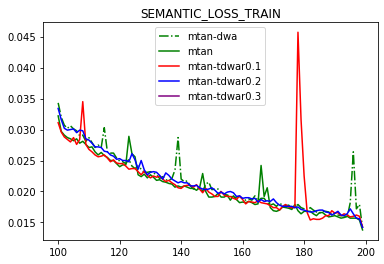

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


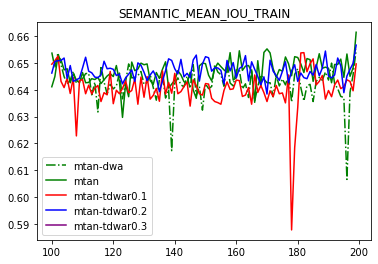

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


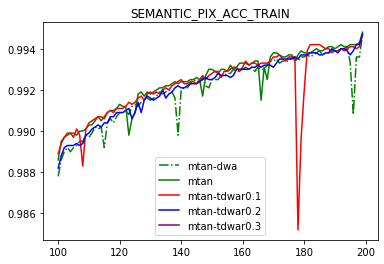

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


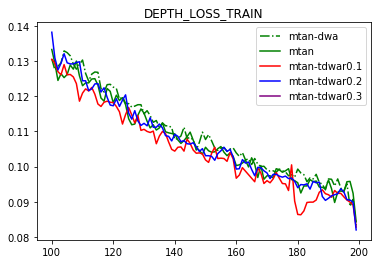

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


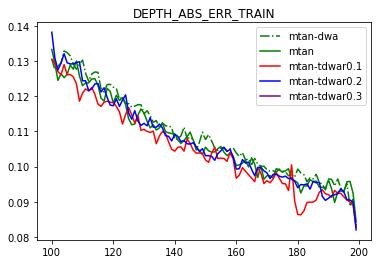

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


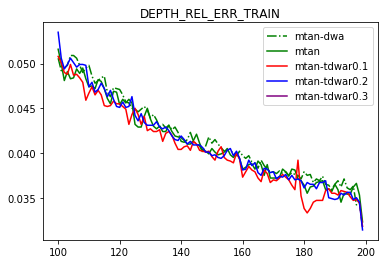

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


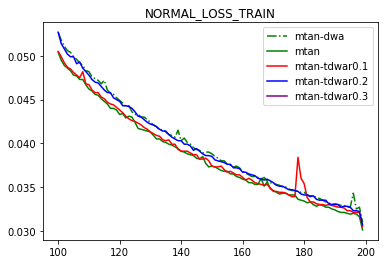

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


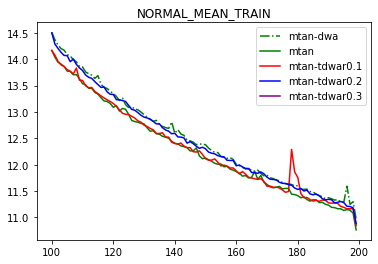

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


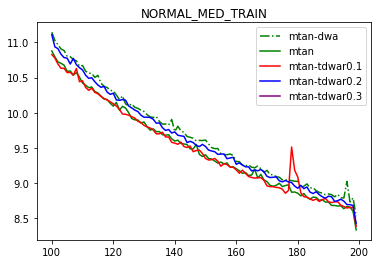

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


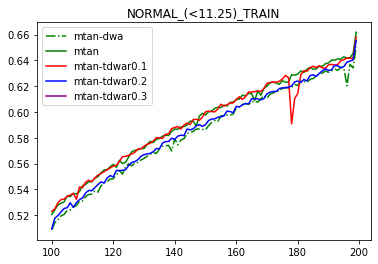

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


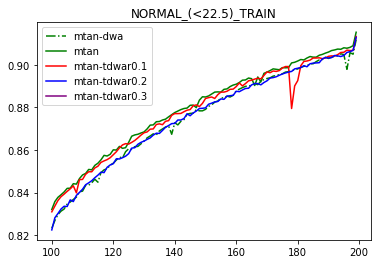

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


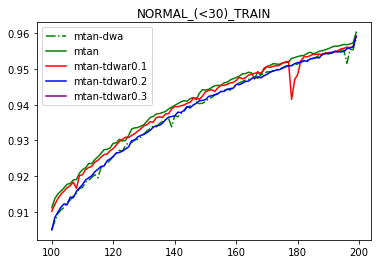

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


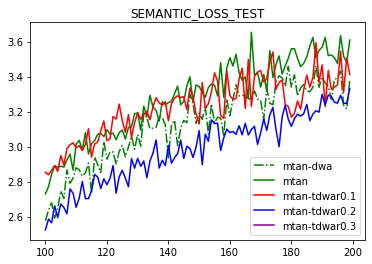

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


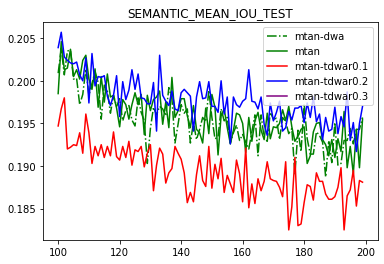

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


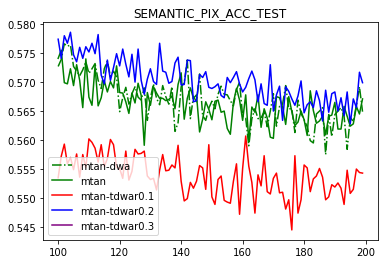

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


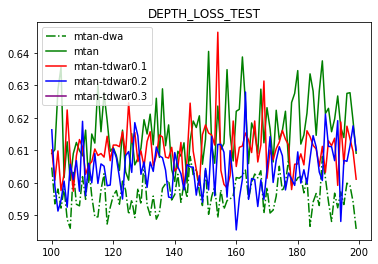

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


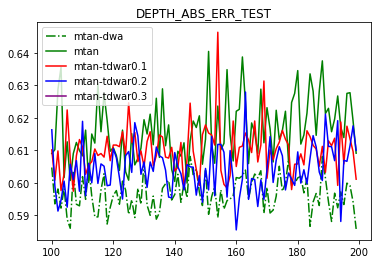

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


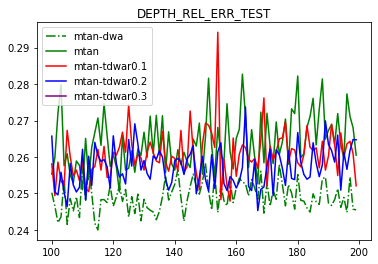

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


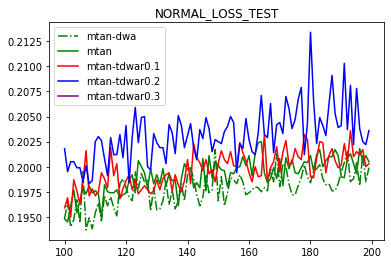

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


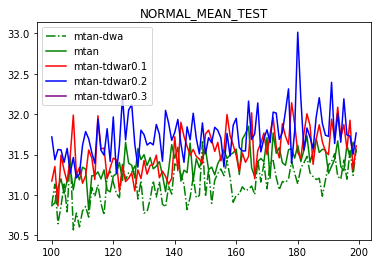

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


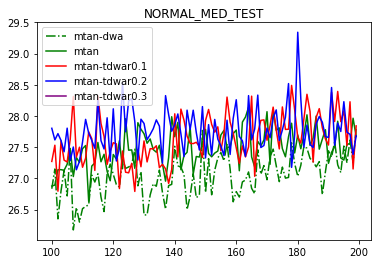

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


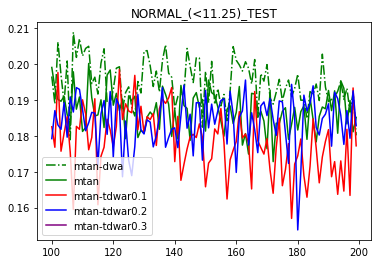

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


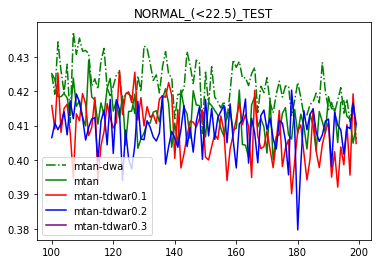

['nyuv2', 'mtan', 'all', 'dwa', 'multi']
['nyuv2', 'mtan', 'all', 'NOdwa', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.1', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.2', 'multi']
['nyuv2', 'mtan', 'all', 'tdwar0.3', 'multi']


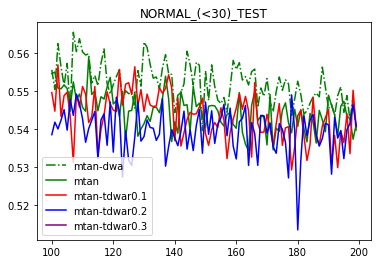

In [24]:
# SEMANTIC_LOSS_TEST
rng_st, rng_en = 100, 200 
cnames = singletask_cnames_SEMANTIC + singletask_cnames_DEPTH + singletask_cnames_NORMAL
cnames = [ c+m for m in ["_TRAIN","_TEST"] for c in cnames ]
for cname in cnames:
    #cname = "NORMAL_MEAN_TRAIN"
    for f,attr in zip(filenames, attrs):
        plt.title(cname)
        dataset, model_type, task, dwa, task_type = attr  
        #if task_type=='multi' or (task_type=='sgl' and task=='semantic'):
        if model_type[:4]=='mtan' :
            print(attr)
            label = model_type+"-"+dwa if (task_type=='multi') and (dwa!='NOdwa')  else model_type
            df_ = df[df['filename']==f]
            plt.plot(df_["Epoch"][rng_st:rng_en], 
                     df_[cname][rng_st:rng_en],
                     color=style[label][0],linestyle=style[label][1] ,label=label )
            #plt.ylim([0,5])
            #plt.xlim([0,300])

        plt.legend()        
    plt.savefig(f"plot[100-200]/{cname}-epo[{rng_st}-{rng_en-1}].png")
    plt.show()

In [ ]:
df_last = df[df['Epoch']==199].set_index("filename")
take_cols = [ k for k in df_last.keys() if ("TEST" in k) and (not "LOSS" in k)]
df_last = df_last[take_cols]
df_last.to_csv('out.csv')

In [ ]:
df_last